LIBRERIAS A USAR

In [93]:

# Pandas para manejo de datos
import pandas as pd


# MatplotLib para grafos
import matplotlib.pyplot as plt

# Seaborn para grafos
import seaborn as sns

# Numpy para manejo de datos
import numpy as np

CARGAR DATOS

In [53]:
        # Url de los datos 
url = "https://drive.google.com/uc?id=1RoSzovZx4l6CixdVfJTt527_WfCFqPO4&export=download"


# Convertir a DataFrame con pandas
df = pd.read_csv(url)


ANALISIS EXPLORATORIO DE DATOS

In [54]:

# Mostra el tipo de dato de cada columna
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135076 entries, 0 to 135075
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ORDEN                   135076 non-null  int64 
 1   ARMAS_MEDIOS            135076 non-null  object
 2   BARRIOS_HECHO           135076 non-null  object
 3   LATITUD                 135076 non-null  object
 4   LONGITUD                135076 non-null  object
 5   ZONA                    135076 non-null  object
 6   NOM_COMUNA              135076 non-null  object
 7   ANO                     135076 non-null  int64 
 8   MES                     135076 non-null  object
 9   DIA                     135076 non-null  int64 
 10  DIA_SEMANA              135076 non-null  object
 11  DESCRIPCION_CONDUCTA    135076 non-null  object
 12  CONDUCTA                135076 non-null  object
 13  CLASIFICACIONES DELITO  135076 non-null  object
 14  CURSO_DE_VIDA           135076 non-n

In [55]:
# Mostrar las primeras filas del DataFrame
df.head()


,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,"7,170,557,382","-73,135,108",URBANA,14. MORRORICO,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,05. ADULTEZ,UNION LIBRE,MASCULINO,A PIE,A PIE
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,"7,120,645,358","-7,312,605",URBANA,05. GARCÍA ROVIRA,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,04. JOVENES,SOLTERO,MASCULINO,A PIE,A PIE
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,"7,120,645,358","-7,312,605",URBANA,05. GARCÍA ROVIRA,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,04. JOVENES,SOLTERO,MASCULINO,A PIE,A PIE
3,4,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,"715,135,927","-73,145,704,583",URBANA,03. SAN FRANCISCO,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,05. ADULTEZ,CASADO,MASCULINO,A PIE,A PIE
4,5,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,"7,170,557,382","-73,135,108",URBANA,04. OCCIDENTAL,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,04. JOVENES,UNION LIBRE,MASCULINO,A PIE,A PIE


In [56]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distintos valores")

ORDEN: 135076 distintos valores
ARMAS_MEDIOS: 43 distintos valores
BARRIOS_HECHO: 484 distintos valores
LATITUD: 64429 distintos valores
LONGITUD: 60106 distintos valores
ZONA: 4 distintos valores
NOM_COMUNA: 26 distintos valores
ANO: 12 distintos valores
MES: 12 distintos valores
DIA: 31 distintos valores
DIA_SEMANA: 7 distintos valores
DESCRIPCION_CONDUCTA: 43 distintos valores
CONDUCTA: 41 distintos valores
CLASIFICACIONES DELITO: 4 distintos valores
CURSO_DE_VIDA: 8 distintos valores
ESTADO_CIVIL_PERSONA: 7 distintos valores
GENERO: 3 distintos valores
MOVIL_AGRESOR: 14 distintos valores
MOVIL_VICTIMA: 14 distintos valores


In [57]:
df.BARRIOS_HECHO.unique()

array(['BUENOS AIRES', 'CAMPO HERMOSO', 'COMUNEROS', 'GIRARDOT',
       'LOS ANGELES', 'NARIÑO', 'PROVENZA', 'SOTOMAYOR',
       'URB. BALCONES DE PROVENZA', 'BALCONES DEL KENNEDY', 'CHAPINERO',
       'LA JUVENTUD', 'DON BOSCO', 'ANTONIA SANTOS SUR', 'VDA. LA SABANA',
       'CENTRO', 'JOSE MARIA CORDOBA', 'LA JOYA', 'SAN MARTIN',
       'VDA. RETIRO CHIQUITO', 'VILLA DE LOS CONQUISTADORES',
       'LA CONCORDIA', 'QUINTA ESTRELLA', 'LA CEIBA', 'LA AURORA',
       'COLORADOS', 'SAN FRANCISCO', 'VDA. CUCHILLA ALTA', 'MARIA PAZ',
       'SAN RAFAEL', 'VILLA ROSA', 'URB. HEROES', 'CABECERA DEL LLANO',
       'URB. MARSELLA REAL', 'SANTANDER', 'VILLA MERCEDES', 'EL CRISTAL',
       'EL CINAL', 'CIUDADELA REAL DE MINAS', 'URB. BRISAS DEL MUTIS',
       'TEJAR NORTE (SECTOR I )', 'URB. ESTORAQUES I', 'LA FLORESTA',
       'LA VICTORIA', 'ESPERANZA I', 'LA PALMA', 'LA PEDREGOSA',
       'REGADERO NORTE', 'GARCIA ROVIRA', 'MEJORAS PUBLICAS', 'LA FERIA',
       'ALFONSO LOPEZ', 'BUCARAMANGA', 

In [58]:
df.BARRIOS_HECHO.unique().shape

(484,)

In [59]:
df.ARMAS_MEDIOS.unique()

#NaN No reporta

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'MOTO', 'NO REPORTADO', 'SIN EMPLEO DE ARMAS', 'VEHICULO',
       'LLAVE MAESTRA', 'CORTANTES', 'LLAMADA TELEFONICA',
       'CORTOPUNZANTES', 'ESCOPOLAMINA', 'DIRECTA', 'REDES SOCIALES',
       'PUNZANTES', 'BICICLETA', 'PERRO', 'MEDICAMENTOS',
       'SUSTANCIAS TOXICAS', 'GASES', 'MIXTA', 'QUIMICOS',
       'AGUA CALIENTE', 'POLVORA(FUEGOS PIROTECNICOS)', 'PAPA EXPLOSIVA',
       'JERINGA', 'ARTEFACTO INCENDIARIO', 'ACIDO', 'CARTA EXTORSIVA',
       'LICOR ADULTERADO', 'COMBUSTIBLE', 'CARRO BOMBA', 'VENENO',
       'CUCHILLA', 'CINTAS/CINTURON', 'CUERDA/SOGA/CADENA', 'PALANCAS',
       'GRANADA DE MANO', 'BOLSA PLASTICA',
       'ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'PRENDAS DE VESTIR',
       'ARMA TRAUMATICA', 'ALUCINOGENOS'], dtype=object)

In [60]:
df.ZONA.unique()

array(['URBANA', 'RURAL', 'OTROS', 'NO REPORTA'], dtype=object)

In [61]:
df.NOM_COMUNA.unique()

# REVISAR QUE ES PARTE DE BUCARAMANGA
#Nan Sin informacion

array(['14. MORRORICO', '05. GARCÍA ROVIRA', '03. SAN FRANCISCO',
       '04. OCCIDENTAL', '02. NOR ORIENTAL', '10. PROVENZA',
       '12. CABECERA DEL LLANO', '11. SUR', '01. NORTE',
       '09. LA PEDREGOSA', 'CORREGIMIENTO 1', '15. CENTRO',
       'CORREGIMIENTO 3', '06. LA CONCORDIA', '13. ORIENTAL', '17. MUTIS',
       '07. LA CIUDADELA', '08. SUR OCCIDENTE', '16. LAGOS DEL CACIQUE',
       'FLORIDABLANCA', 'CORREGIMIENTO 2', 'SIN INFORMACION', 'GIRON',
       'BARRANCABERMEJA', 'MEDELLIN', 'PIEDECUESTA'], dtype=object)

In [62]:
df.NOM_COMUNA.unique().shape

(26,)

In [63]:
df.CLASIFICACIONES_DELITO.unique()

AttributeError: 'DataFrame' object has no attribute 'CLASIFICACIONES_DELITO'

In [45]:
df.CONDUCTA.unique()

#NaN No reporta

array(['LESIONES PERSONALES', 'HURTO A PERSONAS', 'HOMICIDIO',
       'HURTO A RESIDENCIAS', 'HURTO A ENTIDADES COMERCIALES',
       'VIOLENCIA INTRAFAMILIAR',
       'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
       'HURTO A MOTOCICLETAS', 'ACTOS SEXUALES CON MENOR DE 14 AÑOS',
       'ACOSO SEXUAL', 'HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)',
       'ACCESO CARNAL VIOLENTO', 'EXTORSIÓN',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS AGRAVACIÓN)',
       'ACTO SEXUAL VIOLENTO', 'HURTO A AUTOMOTORES',
       'SECUESTRO EXTORSIVO', 'HURTO A ENTIDADES FINANCIERAS',
       'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR',
       'ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR',
       'HURTO A PIRATERÍA TERRESTRE',
       'ACTO SEXUAL VIOLENTO (CIRCUNSTANCIAS DE AGRAVACIÓN)',
       'ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS DE AGRAVACIÓN)',
       'HURTO 

In [15]:
df.CONDUCTA.unique().shape

(41,)

In [16]:
df.MOVIL_AGRESOR.unique()

#NaN No reporta

array(['A PIE', 'CONDUCTOR MOTOCICLETA', 'CONDUCTOR VEHICULO',
       'CONDUCTOR TAXI', 'NO REPORTA', 'PASAJERO BUS', 'PASAJERO TAXI',
       'BICICLETA', 'PASAJERO MOTOCICLETA', 'PASAJERO METRO',
       'CONDUCTOR BUS', 'PASAJERO VEHICULO', 'TRIPULANTE AERONAVE',
       'PASAJERO BARCO'], dtype=object)

In [17]:
df.MOVIL_VICTIMA.unique()

#NaN No reporta

array(['A PIE', 'NO REPORTA', 'CONDUCTOR MOTOCICLETA',
       'CONDUCTOR VEHICULO', 'PASAJERO TAXI', 'PASAJERO BUS',
       'CONDUCTOR TAXI', 'BICICLETA', 'PASAJERO MOTOCICLETA',
       'CONDUCTOR BUS', 'PASAJERO METRO', 'PASAJERO VEHICULO',
       'PASAJERO BARCO', 'PASAJERO AERONAVE'], dtype=object)

In [18]:
df.DESCRIPCION_CONDUCTA.unique()



array(['ARTÍCULO 111. LESIONES PERSONALES',
       'ARTÍCULO 239. HURTO A PERSONAS', 'ARTÍCULO 103. HOMICIDIO',
       'ARTÍCULO 239. HURTO A RESIDENCIAS',
       'ARTÍCULO 239. HURTO A ENTIDADES COMERCIALES',
       'ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR',
       'ARTÍCULO 120. LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )',
       'ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
       'ARTÍCULO 239. HURTO A MOTOCICLETAS',
       'ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS',
       'ARTÍCULO 210 A. ACOSO SEXUAL',
       'ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)',
       'ARTÍCULO 205. ACCESO CARNAL VIOLENTO', 'ARTÍCULO 244. EXTORSIÓN',
       'ARTÍCULO 211. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS AGRAVACIÓN)',
       'ARTÍCULO 206. ACTO SEXUAL VIOLENTO',
       'ARTÍCULO 239. HURTO A AUTOMOTORES',
       'ARTÍCULO 169. SECUESTRO EXTORSIVO',
       'ARTÍCULO 239. HURTO A ENTIDADES FINANCIERAS',
       'ARTÍCULO 207. ACCESO CARNA

In [50]:
df.DESCRIPCION_CONDUCTA.unique().shape

(43,)

In [51]:
# Descripcion estadistica de los datos numericos
df.describe()

,ORDEN,ANO,DIA
count,135076.000000,135076.000000,135076.000000
mean,67538.500000,2015.724896,15.488510
std,38993.226818,3.344696,8.811255
min,1.000000,2010.000000,1.000000
25%,33769.750000,2013.000000,8.000000
50%,67538.500000,2016.000000,15.000000
75%,101307.250000,2019.000000,23.000000
max,135076.000000,2021.000000,31.000000


In [70]:
# Descripcion estadistica de los datos categoricos
df[['ARMAS_MEDIOS', 'BARRIOS_HECHO', 'LATITUD', 'LONGITUD', 'ZONA', 'NOM_COMUNA', 'MES', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA', 'CLASIFICACIONES_DELITO', 'MOVIL_VICTIMA', 'MOVIL_AGRESOR']].value_counts()

ARMAS_MEDIOS                 BARRIOS_HECHO          LATITUD        LONGITUD         ZONA    NOM_COMUNA         MES             DIA_SEMANA     DESCRIPCION_CONDUCTA                                          CLASIFICACIONES_DELITO  MOVIL_VICTIMA          MOVIL_AGRESOR       
SIN EMPLEO DE ARMAS          CHORRERAS DE DON JUAN  7,144,371      -73,128,085      URBANA  05. GARCÍA ROVIRA  09. SEPTIEMBRE  02. MARTES     ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR                         LESIONES NO FATALES     A PIE                  A PIE                   22
VEHICULO                     ANTONIA SANTOS SUR     709,910,762    -731,112,241     URBANA  09. LA PEDREGOSA   01. ENERO       03. MIÉRCOLES  ARTÍCULO 120. LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )  LESIONES NO FATALES     PASAJERO BUS           CONDUCTOR VEHICULO      20
                             URB. COLSEGUROS NORTE  7,147,648,168  -7,313,271,932   URBANA  01. NORTE          01. ENERO       03. MIÉRCOLES  ARTÍCULO 120. LESIONES CULPOSA

<Axes: >

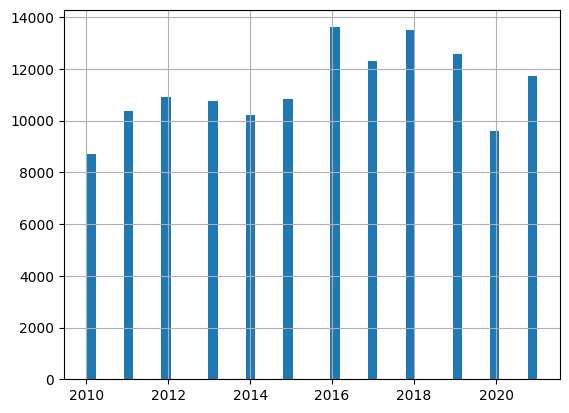

In [71]:
# Detectar valores atipicos en los datos
df['ANO'].hist(bins='auto')

<Axes: >

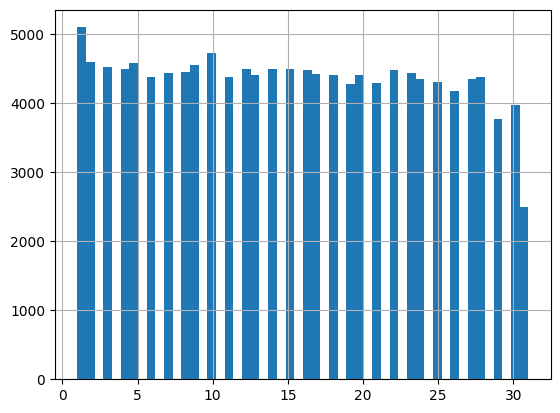

In [72]:
df['DIA'].hist(bins='auto')

In [52]:
# Identificar datos null
df.isnull().sum()

ORDEN                     0
ARMAS_MEDIOS              0
BARRIOS_HECHO             0
LATITUD                   0
LONGITUD                  0
ZONA                      0
NOM_COMUNA                0
ANO                       0
MES                       0
DIA                       0
DIA_SEMANA                0
DESCRIPCION_CONDUCTA      0
CONDUCTA                  0
CLASIFICACIONES_DELITO    0
CURSO_DE_VIDA             0
ESTADO_CIVIL_PERSONA      0
GENERO                    0
MOVIL_AGRESOR             0
MOVIL_VICTIMA             0
dtype: int64

In [83]:
duplicate_rows_data = df[df.duplicated()]
print("numero de filas dulicadas completamente: ", duplicate_rows_data.shape[0])

numero de filas dulicadas completamente:  0


FEATURE ENGINEERING


In [84]:
# Renombrar columnas
df = df.rename(columns={'CLASIFICACIONES DELITO': 'CLASIFICACIONES_DELITO'})

In [87]:
# Eliminar columnas innecesarias

# Se elimina estado_civil_persona por falta de utilidad en prediccion
df = df.drop(["ESTADO_CIVIL_PERSONA"], axis=1)

KeyError: "['ESTADO_CIVIL_PERSONA'] not found in axis"

In [76]:
# Se elimina curso_de_vida por falta de utilidad en prediccion
df = df.drop(["CURSO_DE_VIDA"], axis=1)

KeyError: "['CURSO_DE_VIDA'] not found in axis"

In [77]:
# Se elimina genero por falta de utilidad en prediccion
df = df.drop(["GENERO"], axis=1)

KeyError: "['GENERO'] not found in axis"

In [78]:
# Se elimina conducta por redundancia con descripcion_conducta y disonancia en el shape de las clasificaciones
df = df.drop(["CONDUCTA"], axis=1)

KeyError: "['CONDUCTA'] not found in axis"

In [88]:
# Ver proporciones de datos faltantes
df.isna().sum() / len(df) * 100

ORDEN                     0.000000
ARMAS_MEDIOS              1.564305
BARRIOS_HECHO             0.000000
LATITUD                   0.000000
LONGITUD                  0.000000
ZONA                      1.620569
NOM_COMUNA                0.000000
ANO                       0.000000
MES                       0.000000
DIA                       0.000000
DIA_SEMANA                0.000000
DESCRIPCION_CONDUCTA      0.008884
CLASIFICACIONES_DELITO    0.008884
MOVIL_AGRESOR             0.321301
MOVIL_VICTIMA             0.652225
dtype: float64

In [89]:
# Cambiar a valores NaN los datos no reportados
df.replace("NO REPORTA", np.nan, inplace=True)

In [90]:
df.replace("NO REPORTADO", np.nan, inplace=True)

In [91]:
df.isna().sum() / len(df) * 100


ORDEN                     0.000000
ARMAS_MEDIOS              1.564305
BARRIOS_HECHO             0.000000
LATITUD                   0.000000
LONGITUD                  0.000000
ZONA                      1.620569
NOM_COMUNA                0.000000
ANO                       0.000000
MES                       0.000000
DIA                       0.000000
DIA_SEMANA                0.000000
DESCRIPCION_CONDUCTA      0.008884
CLASIFICACIONES_DELITO    0.008884
MOVIL_AGRESOR             0.321301
MOVIL_VICTIMA             0.652225
dtype: float64